<a href="https://colab.research.google.com/github/edmarja/projects-datascience/blob/main/Estudio_caso_educacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Escenario**
Eres un analista de datos para el distrito escolar local y te han pedido que resumas el desempeño de los estudiantes senior del colegio en una nueva prueba estandarizada.

A la administración le gustaría ver una tabla con las estadísticas resumidas para los ocho colegios del distrito. La tabla debería incluir el nombre del colegio, el número de seniors, el número de seniors que hicieron la prueba, el porcentaje de seniors que se ausentaron durante la prueba y las estadísticas del desempeño en la prueba como la media, la mediana y las calificaciones máximas y mínimas.

Toda la información necesaria se ha recopilado en un archivo de Excel de tres hojas. La hoja ``school_dict`` contiene el identificador numérico del colegio y el nombre, ``student_counts`` contiene el número de estudiantes matriculados por colegio y nivel, y ``test_results`` contiene identificador numérico de cada estudiante, el identificador del colegio y la calificación de la prueba.

En este estudio de caso validarás rápidamente las calificaciones de la prueba a través de los diagramas de caja y crearás la tabla requerida combinando información de las tres hojas.

In [ ]:
import pandas as pd

In [ ]:
# carga el diccionario del colegio (school_dict sheet)
school_dict= pd.read_excel('standardized_test_results_esp.xlsx', sheet_name= 0)

# carga el recuento de estudiantes (student_counts sheet)
student_cts = pd.read_excel('standardized_test_results_esp.xlsx', sheet_name=1,)

# carga los resultados de la prueba (test_results sheet)
student_scores = pd.read_excel('standardized_test_results_esp.xlsx', sheet_name=2)

In [ ]:
# imprime el diccionario del colegio
print(school_dict)
print()
# imprime el recuento de estudiantes
student_cts

   school_ID                        school_name
0       5753                Instituto Elk Creek
1       9069       Instituto Martin Luther King
2       6221           Instituto Harriet Tubman
3       6299           Instituto Fred Korematsu
4       9239                 Instituto Lakewood
5       8342           Instituto Trout Mountain
6       9856  Instituto y Academia Angela Davis
7       9631            Instituto James Baldwin



,school_name,n_students9,n_students10,n_students11,n_students12
0,Instituto Elk Creek,410,393,378,400
1,Instituto Martin Luther King,350,356,334,338
2,Instituto Harriet Tubman,407,375,406,370
3,Instituto Fred Korematsu,366,361,338,349
4,Instituto Lakewood,263,289,288,268
5,Instituto Trout Mountain,363,361,387,357
6,Instituto y Academia Angela Davis,450,478,521,488
7,Instituto James Baldwin,233,223,227,217


In [ ]:
# imprime las primeras 5 filas de student_scores
print(student_scores.head())
print()
# imprime "Número total de alumnos:" con la longitud de student_scores
print('Número total de alumnos:', len(student_scores))

   school_ID  student_ID  scores
0       5753      100535      93
1       5753      100173      99
2       5753      100049      86
3       5753      100678      93
4       5753      100088      90

Número total de alumnos: 2787


Antes de crear informes o datos para compartirlos, debes decidir cuan seguro estás de esos datos.

Para confiar en los datos student_scores, haz diagramas de caja de las calificaciones de cada colegio y estudia las distribuciones. Utiliza los parámetros opcionales de boxplot() ``column='variable para trazar'`` y ``by='variable de agrupación'``.

In [ ]:
import matplotlib.pyplot as plt

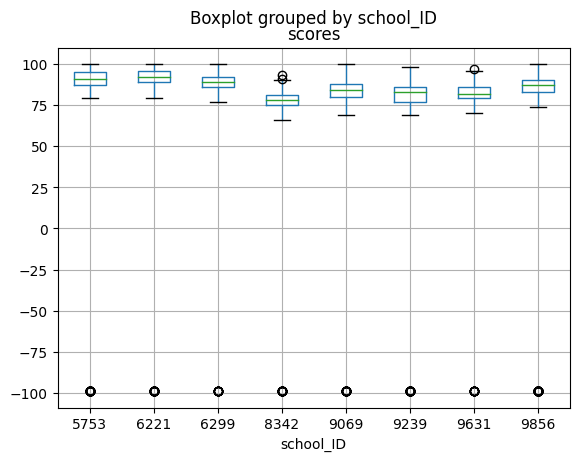

In [ ]:
student_scores.boxplot(column='scores', by='school_ID')
plt.show()

Observamos que hay valores negativos!!. 

Resulta que -99 se utiliza como un código numérico para "estudiante ausente". Necesitarás eliminar estos valores y rediseñar los diagramas de caja.
Actualiza ``student_scores`` escribiendo una consulta que seleccione todas las filas donde ``scores`` no sea igual a -99. En la consulta, menciona la variable provista ``missing_indicator``.

Crea los diagramas de caja de nuevo pero hazlos más grandes. Configura el tamaño de la figura a 15 por 6 pulgadas.

In [ ]:
student_scores[student_scores.scores == -99]

,school_ID,student_ID,scores
6,5753,100433,-99
26,5753,100792,-99
27,5753,100836,-99
28,5753,100562,-99
32,5753,100069,-99
...,...,...,...
2681,9631,800297,-99
2710,9631,800135,-99
2731,9631,800531,-99
2733,9631,800000,-99


In [ ]:
#código de estudiante ausente
missing_indicator = -99

student_scores = student_scores.query('scores != -99')

#comprobamos que ya no esté dicho valor
student_scores[student_scores.scores == -99]


,school_ID,student_ID,scores


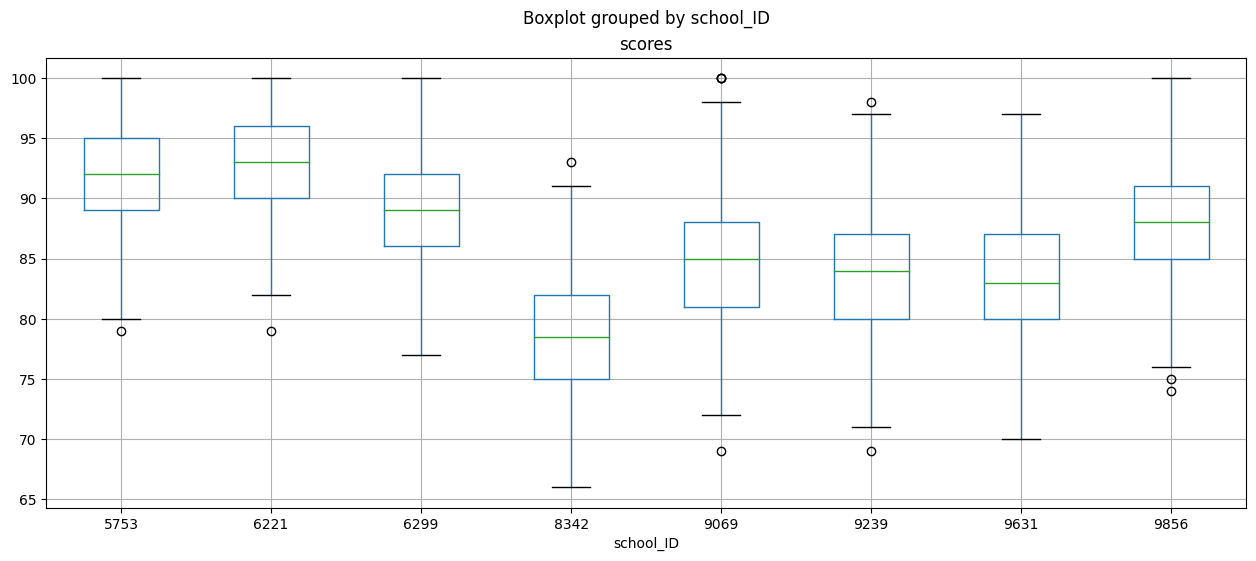

In [ ]:
#creamos nuestyro gráfico nuevamente
student_scores.boxplot(column='scores', by='school_ID', figsize=(15,6))
plt.show()

>### **El panorama general hasta ahora**
>Tras cargar los datos, podrías haber empezado inmediatamente a crear la tabla que la administración te pidió. En su lugar, hiciste tu propia verificación de datos visualizando la distribución de las calificaciones, por colegio, utilizando los diagramas de caja. Lo hiciste bien porque nadie te habló de los valores -99. Eliminaste estos valores y rehiciste los diagramas de caja. A partir de los diagramas de caja, verás que no hay valores mayores de 100 o menores de 66, que hay valores atípicos altos y bajos, y que algunos colegios tienen calificaciones más dispersas (school_ID = 9631) en comparación con otros (school_ID = 6221). En general, los valores son realistas y las distribuciones son similares de alguna forma. No se plantean preguntas así que podemos confiar en los datos.

Las partes interesadas a menudo te dirán lo que piensan que quieren, lo que a veces es diferente a lo que realmente necesitan. No te pidieron que crearas diagramas de caja, pero sabes que estas figuras sintetizan perfectamente las semejanzas y las diferencias en las calificaciones entre colegios que es lo que la administración necesita saber. Tú decides incluirlo con la tabla.

La claridad puede realizarse reemplazando los valores numéricos ``school_ID`` con los nombres de los colegios. Haz eso añadiendo ``school_name`` al conjunto de datos ``student_scores`` y rediseñando.
1. Utiliza ``merge()`` para añadir ``school_name`` desde el diccionario del colegio al conjunto de datos de las calificaciones del estudiante.
2. Imprime las cinco primeras filas de ``student_scores_with_school`` para asegurarte de que ha funcionado.

In [ ]:
# fusiona school_dict en student_scores para añadir school_name
student_scores_with_school= student_scores.merge(school_dict, on='school_ID')

student_scores_with_school.head()

,school_ID,student_ID,scores,school_name
0,5753,100535,93,Instituto Elk Creek
1,5753,100173,99,Instituto Elk Creek
2,5753,100049,86,Instituto Elk Creek
3,5753,100678,93,Instituto Elk Creek
4,5753,100088,90,Instituto Elk Creek


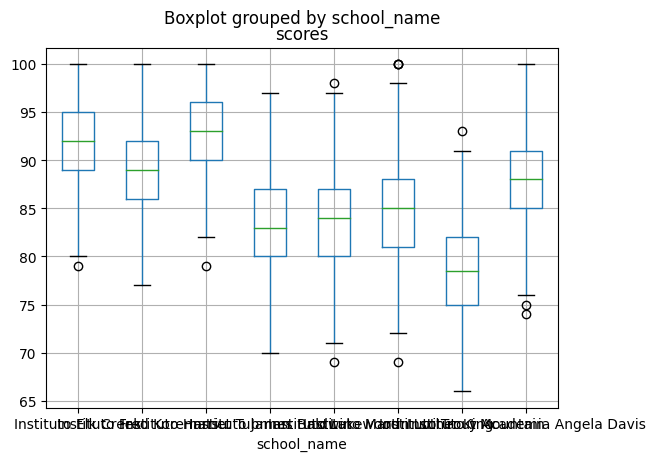

In [ ]:
#Recreamos los diagramas de caja. Esta vez agrupado por school_name.
student_scores_with_school.boxplot(column='scores', by='school_name')
plt.show()

Los nombres de los colegios se ven apilados. Hay que rotarlos.

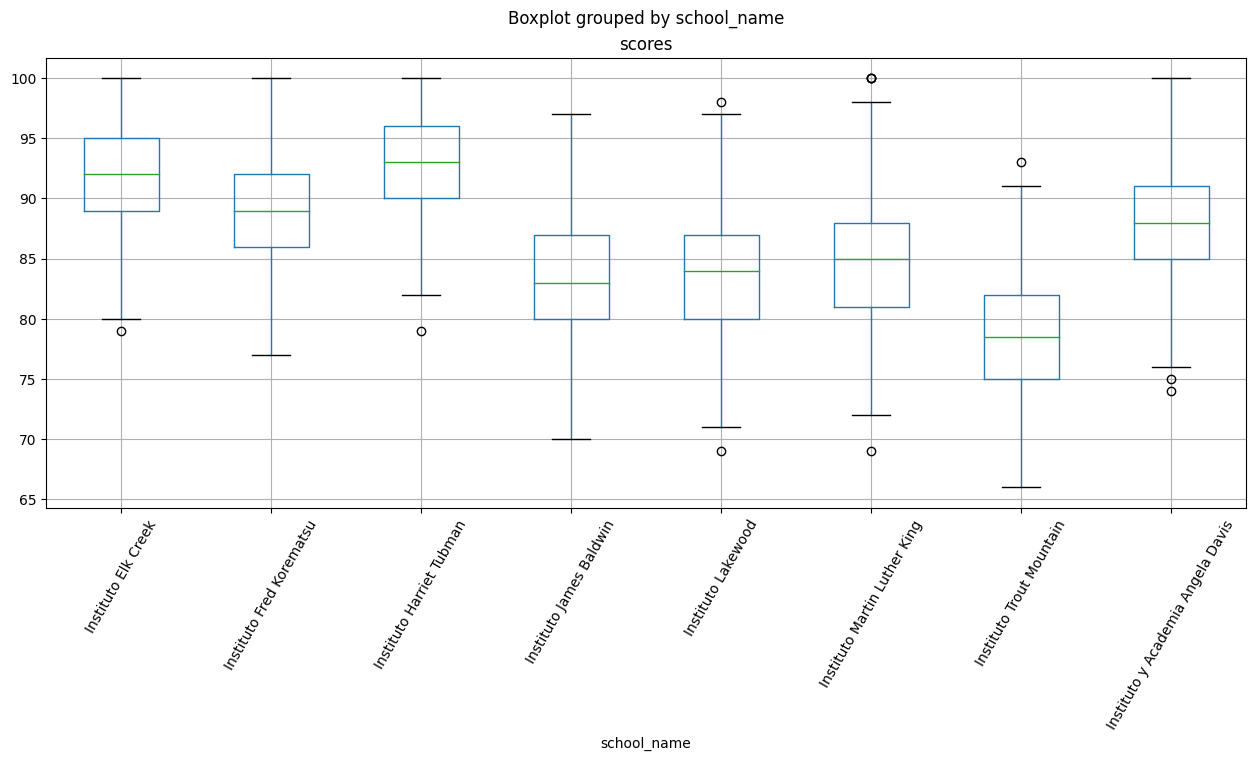

In [ ]:
student_scores_with_school.boxplot(column='scores', by='school_name', figsize=(15,6))
plt.xticks(rotation=60) #rotación a 60°
plt.show()

>## **¡Importante!**
>La comparación del ejercicio 3 y 5 revela una conducta predeterminada de boxplot() con el argumento by=: los diagramas de caja, por grupo, se ordenan en orden numérico o alfabético. A menos que haya una razón para ordenar estos colegios de otra forma, el orden es algo que depende de ti. ¿Te parece bien el orden alfabético? ¿O deberíamos ordenar por orden decreciente de las medianas o rangos (máximo-mínimo)? Lo dejaremos como está por ahora pero esto es algo que siempre hay que tener en cuenta.

Deja momentáneamente los diagramas de caja y empieza a crear la tabla que la administración pidió.
1. Crea una tabla dinámica de 'scores', por school_ID, con el recuento de estadísticas, media, mediana, mínimo y máximo.

In [ ]:
student_scores_stat = student_scores.pivot_table(index='school_ID', values='scores', aggfunc=['count','mean', 'median', 'min', 'max'] )
student_scores_stat.head()

,count,mean,median,min,max
,scores,scores,scores,scores,scores
school_ID,,,,,
5753,356,92.014045,92.0,79,100
6221,337,92.916914,93.0,79,100
6299,339,89.182891,89.0,77,100
8342,332,78.629518,78.5,66,93
9069,311,84.919614,85.0,69,100


Este es el comienzo de la tabla que la administración quiere ver. Todavía hace falta añadir dos columnas (número de seniors y porcentaje de seniors que estban ausentes) y limpiar la tabla.

Cambia el nombre de las columnas a 'n_test', 'mean', 'median', 'min' y 'max'. Imprime de nuevo la tabla para verificar el cambio.

In [ ]:
student_scores_stat.columns = ['n_test', 'mean', 'median', 'min', 'max']
student_scores_stat.head()

,n_test,mean,median,min,max
school_ID,,,,,
5753,356,92.014045,92.0,79,100
6221,337,92.916914,93.0,79,100
6299,339,89.182891,89.0,77,100
8342,332,78.629518,78.5,66,93
9069,311,84.919614,85.0,69,100


Continúa limpiando la tabla cambiando el índice de student_scores_stat a 'school_name'.

Primero, necesitas añadir la columna 'school_name' a la tabla con el argumento ``join()``. También se podría usar ``merge()`` y no habría necesidad de cambiar el índice; pero para practicar usaremos join(). Recordemos que ``join()`` trabaja con índices.

In [ ]:
#mostramos la tabla school_dict
print(school_dict.head())
print()

#mostramos la tabla student_scores_stat
student_scores_stat.head()

   school_ID                   school_name
0       5753           Instituto Elk Creek
1       9069  Instituto Martin Luther King
2       6221      Instituto Harriet Tubman
3       6299      Instituto Fred Korematsu
4       9239            Instituto Lakewood



,n_test,mean,median,min,max
school_ID,,,,,
5753,356,92.014045,92.0,79,100
6221,337,92.916914,93.0,79,100
6299,339,89.182891,89.0,77,100
8342,332,78.629518,78.5,66,93
9069,311,84.919614,85.0,69,100


Obervamos que el índice es 0,1,2,3.... Es por ello que tenemos que usar ``set.index()`` para cambiar el índice de school_dict para que coincida con el índice de student_scores_stat

In [ ]:
student_scores_stat = student_scores_stat.join(school_dict.set_index('school_ID'), on='school_ID')
student_scores_stat.head()

,n_test,mean,median,min,max,school_name
school_ID,,,,,,
5753,356,92.014045,92.0,79,100,Instituto Elk Creek
6221,337,92.916914,93.0,79,100,Instituto Harriet Tubman
6299,339,89.182891,89.0,77,100,Instituto Fred Korematsu
8342,332,78.629518,78.5,66,93,Instituto Trout Mountain
9069,311,84.919614,85.0,69,100,Instituto Martin Luther King


---

>#NOTA: LA UNION ANTERIOR TAMBIEN SE PUEDE HACER CON MERGE()
  
  CODIGO: student_scores_stat = student_scores_stat.merge(school_dict.set_index('school_ID), on = 'school_ID')

  ![image.png](attachment:image-2.png)

---

In [ ]:
#ahora establecemos school_name como índice en la tabla student_scores_stat
student_scores_stat = student_scores_stat.set_index('school_name')
student_scores_stat.head()

,n_test,mean,median,min,max
school_name,,,,,
Instituto Elk Creek,356,92.014045,92.0,79,100
Instituto Harriet Tubman,337,92.916914,93.0,79,100
Instituto Fred Korematsu,339,89.182891,89.0,77,100
Instituto Trout Mountain,332,78.629518,78.5,66,93
Instituto Martin Luther King,311,84.919614,85.0,69,100


La administración quiere que la tabla incluya el número de seniors de cada colegio. Añade esta columna (nómbrala 'n_seniors') a la tabla sin utilizar el método, es decir, sin declaración de fusión o unión. Recordemos que la columna ``n_students12`` de la hoja de excel student_count contiene los seniors.

In [ ]:
student_cts = pd.read_excel('standardized_test_results_esp.xlsx', sheet_name=1,)
#mostramos la tabla
print(student_cts.head())
print()

#cambiamos el índice, que el indice sea school_name
student_cts = student_cts.set_index('school_name')
student_cts.head()

                    school_name  n_students9  n_students10  n_students11  \
0           Instituto Elk Creek          410           393           378   
1  Instituto Martin Luther King          350           356           334   
2      Instituto Harriet Tubman          407           375           406   
3      Instituto Fred Korematsu          366           361           338   
4            Instituto Lakewood          263           289           288   

   n_students12  
0           400  
1           338  
2           370  
3           349  
4           268  



,n_students9,n_students10,n_students11,n_students12
school_name,,,,
Instituto Elk Creek,410,393,378,400
Instituto Martin Luther King,350,356,334,338
Instituto Harriet Tubman,407,375,406,370
Instituto Fred Korematsu,366,361,338,349
Instituto Lakewood,263,289,288,268


In [ ]:
## crea la columna n_seniors utilizando la columna n_students12 
student_scores_stat['n_seniors'] = student_cts['n_students12']
student_scores_stat.head()

,n_test,mean,median,min,max,n_seniors
school_name,,,,,,
Instituto Elk Creek,356,92.014045,92.0,79,100,400
Instituto Harriet Tubman,337,92.916914,93.0,79,100,370
Instituto Fred Korematsu,339,89.182891,89.0,77,100,349
Instituto Trout Mountain,332,78.629518,78.5,66,93,357
Instituto Martin Luther King,311,84.919614,85.0,69,100,338


La última columna a añadir es el porcentaje de estudiantes seniors que estuvieron ausentes y no hicieron la prueba. El porcentaje de estudiantes que sí hicieron la prueba se puede encontrar dividiendo 'n_test' entre 'n_seniors'. 1 menos este número te dará el porcentaje de estudiantes que estaban ausentes.
Calcula este valor y añádelo a la tabla con el nombre de columna 'pct_absent'.

In [ ]:
#calculamos el procentaje de seniors que no asistieron al examen y las agregamos a la nueva columna pct_absent
student_scores_stat['pct_absent'] = 1-student_scores_stat.n_test/student_scores_stat.n_seniors
student_scores_stat.head()

,n_test,mean,median,min,max,n_seniors,pct_absent
school_name,,,,,,,
Instituto Elk Creek,356,92.014045,92.0,79,100,400,0.110000
Instituto Harriet Tubman,337,92.916914,93.0,79,100,370,0.089189
Instituto Fred Korematsu,339,89.182891,89.0,77,100,349,0.028653
Instituto Trout Mountain,332,78.629518,78.5,66,93,357,0.070028
Instituto Martin Luther King,311,84.919614,85.0,69,100,338,0.079882


Listo. Esta tabla contine la información necesaria y junto con el diagrama de caja aportarn información para la jefatura como la similitud y diferencia entre colegios 

## **Resumen**
La mejor validación, sin embargo, es la consistencia. En este caso, estás aportando a la administración una tabla de las estadísticas resumidas y un conjunto de diagramas de caja. Antes de entregarlos, valdría la pena comprobar la consistencia entre los dos. ¿El mínimo, la mediana y el máximo de los valores corresponden a los valores en los diagramas de caja para cada colegio? Si no es así, algo está mal en tu código. Recuerda, solo porque tu código no produzca un error no significa que no se haya cometido un fallo. Es mejor que seas tú quien encuentre los errores antes de que lo haga alguien más.

Siempre que produzcas resultados, deberías ser tú la primera persona que los analice. Sentarse, pensar y quedarse mirando fijamente los datos es parte de tu trabajo. No pienses que no puedes perder tiempo en esto.